<a href="https://colab.research.google.com/github/ReganovaLisa/Neuromatch_solutions/blob/main/Calculus_W0D4_Tutorial1%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 1: Differentiation and Integration
**Week 0, Day 4: Calculus**

**By Neuromatch Academy**

__Content creators:__ John S Butler, Arvind Kumar with help from Ella Batty

__Content reviewers:__  Aderogba Bayo, Tessy Tom, Matt McCann

__Production editors:__ Matthew McCann, Ella Batty

**Our 2021 Sponsors, including Presenting Sponsor Facebook Reality Labs**

<p align='center'><img src='https://github.com/NeuromatchAcademy/widgets/blob/master/sponsors.png?raw=True'/></p>

---
# Tutorial Objectives

*Estimated timing of tutorial: 80 minutes*

In this tutorial, we will cover aspects of calculus that will be frequently used in the main NMA course. We assume that you  have some familiarty with calculus, but may be a bit rusty or may not have done much practice.  Specifically the objectives of this tutorial are

*   Get an intuitive understanding of derivative and integration operations
*   Learn to calculate the derivatives of 1- and 2-dimensional functions/signals numerically
*   Familiarize with the concept of neuron transfer function in 1- and 2-dimensions.
*   Familiarize with the idea of numerical integration using Riemann sum




In [1]:
# @title Video 1: Why do we care about calculus?
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV1F44y1z7Uk", width=854, height=480, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="NZwfH_dG2wI", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

---
# Setup

In [2]:
# Imports
!pip install sympy --quiet

import numpy as np
import scipy.optimize as opt       # import root-finding algorithm
import sympy as sp                 # Python toolbox for symbolic maths
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Toolbox for rendring 3D figures
from mpl_toolkits import mplot3d   # Toolbox for rendring 3D figures

In [3]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display
from ipywidgets import interact
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
my_layout = widgets.Layout()

fig_w, fig_h = 12, 4.5
my_fontsize = 16
my_params = {'axes.labelsize': my_fontsize,
          'axes.titlesize': my_fontsize,
          'figure.figsize': [fig_w, fig_h],
          'font.size': my_fontsize,
          'legend.fontsize': my_fontsize-4,
          'lines.markersize': 8.,
          'lines.linewidth': 2.,
          'xtick.labelsize': my_fontsize-2,
          'ytick.labelsize': my_fontsize-2}

plt.rcParams.update(my_params)

In [4]:
# @title Plotting Functions
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend.process_series()
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

def plot_functions(function, show_derivative, show_integral):

  # For sympy we first define our symbolic variable
  x, y, z, t, f = sp.symbols('x y z t f')

  # We define our function
  if function == 'Linear':
    f = -2*t
    name = r'$-2t$'
  elif function == 'Parabolic':
    f =  t**2
    name = r'$t^2$'
  elif function == 'Exponential':
    f =  sp.exp(t)
    name = r'$e^t$'
  elif function == 'Sine':
    f =  sp.sin(t)
    name = r'$sin(t)$'
  elif function == 'Sigmoid':
    f = 1/(1 + sp.exp(-(t-5)))
    name = r'$\frac{1}{1+e^{-(t-5)}}$'

  if show_derivative and not show_integral:
    # Calculate the derivative of sin(t) as a function of t
    diff_f = sp.diff(f)
    print('Derivative of', f, 'is ', diff_f)

    p1 = sp.plot(f, diff_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='b'
    p1[0].label='Function'
    p1[1].label='Derivative'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()
  elif show_integral and not show_derivative:

    int_f = sp.integrate(f)
    int_f = int_f - int_f.subs(t, -10)
    print('Integral of', f, 'is ', int_f)


    p1 = sp.plot(f, int_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='g'
    p1[0].label='Function'
    p1[1].label='Integral'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()


  elif show_integral and show_derivative:

    diff_f = sp.diff(f)
    print('Derivative of', f, 'is ', diff_f)

    int_f = sp.integrate(f)
    int_f = int_f - int_f.subs(t, -10)
    print('Integral of', f, 'is ', int_f)

    p1 = sp.plot(f, diff_f, int_f, show=False)
    p1[0].line_color='r'
    p1[1].line_color='b'
    p1[2].line_color='g'
    p1[0].label='Function'
    p1[1].label='Derivative'
    p1[2].label='Integral'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()

  else:

    p1 = sp.plot(f, show=False)
    p1[0].line_color='r'
    p1[0].label='Function'
    p1.legend=True
    p1.title = 'Function = ' + name + '\n'
    p1.show()

def plot_alpha_func(t, f, df_dt):

  plt.figure()
  plt.subplot(2,1,1)
  plt.plot(t, f, 'r', label='Alpha function')
  plt.xlabel('Time (au)')
  plt.ylabel('Voltage')
  plt.title('Alpha function (f(t))')
  #plt.legend()

  plt.subplot(2,1,2)
  plt.plot(t, df_dt, 'b', label='Derivative')
  plt.title('Derivative of alpha function')
  plt.xlabel('Time (au)')
  plt.ylabel('df/dt')
  #plt.legend()

def plot_charge_transfer(t, PSP, numerical_integral):

  fig, axes = plt.subplots(1, 2)

  axes[0].plot(t, PSP)
  axes[0].set(xlabel = 't', ylabel = 'PSP')

  axes[1].plot(t, numerical_integral)
  axes[1].set(xlabel = 't', ylabel = 'Charge Transferred')

---
# Section 1: What is differentiation and integration?


In [5]:
# @title Video 2: A geometrical interpretation of differentiation and integration
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV1sU4y1G7Ru", width=854, height=480, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="uQjwr9RQaEs", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

This video covers the definition of differentiation and integration, highlights the geometrical interpretation of each, and introduces the idea of eigenfunctions.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

Calculus is a part of mathematics concerned with **continous change**. There are two branches of calculus: differential calculus and integral calculus. 

Differentiation of a function $f(t)$ gives you the derivative of that function $\frac{d(f(t))}{dt}$. A derivative captures how sensitive a function is to slight changes in the input for different ranges of inputs. Geometrically, the derivative of a function at a certain input is the slope of the function at that input. For example, as you drive, the distance traveled changes continuously with time. The derivative of the distance traveled with respect to time is the velocity of the vehicle at each point in time. The velocity tells you the rate of change of the distance traveled at different points in time. If you have slow velocity (a small derivative), the distance traveled doesn't change much for small changes in time. A high velocity (big derivative) means that the distance traveled changes a lot for small changes in time.

The sign of the derivative of a function (or signal) tells whether the signal is increasing or decreasing. For a signal going through changes as a function of time, the derivative will become zero when the signal changes its direction of change (e.g. from increasing to decreasing). That is, at local minimum or maximum values, the slope of the signal will be zero. This property is used in optimizing problems. But we can also use it to find peaks in a signal. 

Integration can be thought of as the reverse of differentation. If we integrate the velocity with respect to time, we can calculate the distance traveled. By integrating a function, we are basically trying to find functions that would have the original one as their derivative. When we integrate a function, our integral will have an added unknown scalar constant, $C$. 
For example, if $$ g(t) = 1.5t^2 + 4t - 1$$
 
our integral function $f(t)$ will be:
$$ f(t) = \int g(t) dt = 0.5t^3 + 2t^2 - t + C$$.

This constant exists because the derivative of a constant is 0 so we cannot know what the constant should be. This is an indefinite integral. If we compute a definite integral, that is the integral between two limits of the input, we will not have this unknown constant and the integral of a function will capture the area under the curve of that function between those two limits.
</details>

### Interactive Demo 1: Geometrical understanding

In the interactive demo below, you can pick different functions to examine in the drop down menu. You can then choose to show the derivative function and/or the integral function. 

For the integral, we have chosen the unknown constant $C$ such that the integral function at the left x-axis limit is 0 (f(t = -10) = 0). So the integral will reflect the area under the curve starting from that position.

For each function:

*  Examine just the function first. Discuss and predict what the derivative and integral will look like. Remember that derivative = slope of function, integral = area under curve from t = -10 to that t.
*  Check the derivative - does it match your expectations?
*  Check the integral - does it match your expectations?



In [6]:
# @markdown Execute this cell to enable the widget
function_options = widgets.Dropdown(
    options=['Linear', 'Exponential', 'Sine', 'Sigmoid'],
    description='Function',
    disabled=False,
)

derivative = widgets.Checkbox(
    value=False,
    description='Show derivative',
    disabled=False,
    indent=False
)

integral = widgets.Checkbox(
    value=False,
    description='Show integral',
    disabled=False,
    indent=False
)

def on_value_change(change):
    derivative.value = False
    integral.value = False

function_options.observe(on_value_change, names='value')

interact(plot_functions, function = function_options, show_derivative = derivative, show_integral = integral);

interactive(children=(Dropdown(description='Function', options=('Linear', 'Exponential', 'Sine', 'Sigmoid'), v…

In the demo above you may have noticed that the derivative and integral of the exponential function is same as the exponential function itself.

Some functions like the exponential function, when differentiated or integrated, equal a scalar times the same function. This is a similar idea to eigenvectors of a matrix being those that, when multipled by the matrix, equal a scalar times themselves, as you saw yesterday!

When 

\begin{align*}
\frac{d(f(t)}{dt} = a\cdot f(t), 
\end{align*}

we say that $f(t)$ is an **eigenfunction** for derivative operator, where $a$ is a scaling factor. Similarly, when 

\begin{align*}
\int f(t)dt = a\cdot f(t), 
\end{align*}

we say that $f(t)$ is an **eigenfunction** for integral operator.

As you can imagine, working with eigenfunctions can make mathematical analysis easy.

---
# Section 2: Analytical & Numerical Differentiation

In [ ]:
# @title Video 3: Differentiation
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV14g41137d5", width=854, height=480, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="sHogZISXGuQ", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)


In this section, we will delve into how we actually find the derivative of a function, both analytically and numerically.


## Section 2.1: Analytical Differentiation

*Estimated timing to here from start of tutorial: 20 min*

When we find the derivative analytically, we are finding the exact formula for the derivative function. 

To do this, instead of having to do some fancy math every time, we can often consult [an online resource](https://en.wikipedia.org/wiki/Differentiation_rules) for a list of common derivatives, in this case our trusty friend Wikipedia.

If I told you to find the derivative of $f(t) = t^3$, you could consult that site and find in Section 2.1, that if $f(t) = t^n$, then $\frac{d(f(t))}{dt} = nt^{n-1}$. So you would be able to tell me that the derivative of $f(t) = t^3$ is $\frac{d(f(t))}{dt} = 3t^{2}$.

This list of common derivatives often contains only very simple functions. Luckily, as we'll see in the next two sections, we can often break the derivative of a complex function down into the derivatives of more simple components.

### Section 2.1.1: Product Rule
Sometimes we encounter functions which are the product of two functions that both depend on the variable. 
How do we take the derivative of such functions? For this we use the [Product Rule](https://en.wikipedia.org/wiki/Product_rule).

\begin{align}
f(t) = u(t)\cdot v(t)\\
\frac{d(f(t))}{dt} = v\cdot \frac{du}{dt} + u\cdot \frac{dv}{dt}\\
\end{align}


#### Coding Exercise 2.1.1: Derivative of the postsynaptic potential alpha function 

Let's use the product rule to get the derivative of the post-synaptic potential alpha function. As we saw in Video 3, the shape of the postsynaptic potential is given by the so called alpha function:

\begin{align*}
f(t) = t \cdot exp(-\frac{t}{\tau})
\end{align*}

Here $f(t)$ is a product of $t$ and $exp(-\frac{t}{\tau})$. So we can have $u(t) = t$ and $v(t) = exp(-\frac{t}{\tau})$ and use the product rule! 

We have defined $u(t)$ and $v(t)$ in the code below, in terms of the variable $t$ which is an array of time steps from 0 to 10. Define $\frac{du}{dt}$ and $\frac{dv}{dt}$, the compute the full derivative of the alpha function using the product rule. You can always consult wikipedia to figure out $\frac{du}{dt}$ and $\frac{dv}{dt}$!

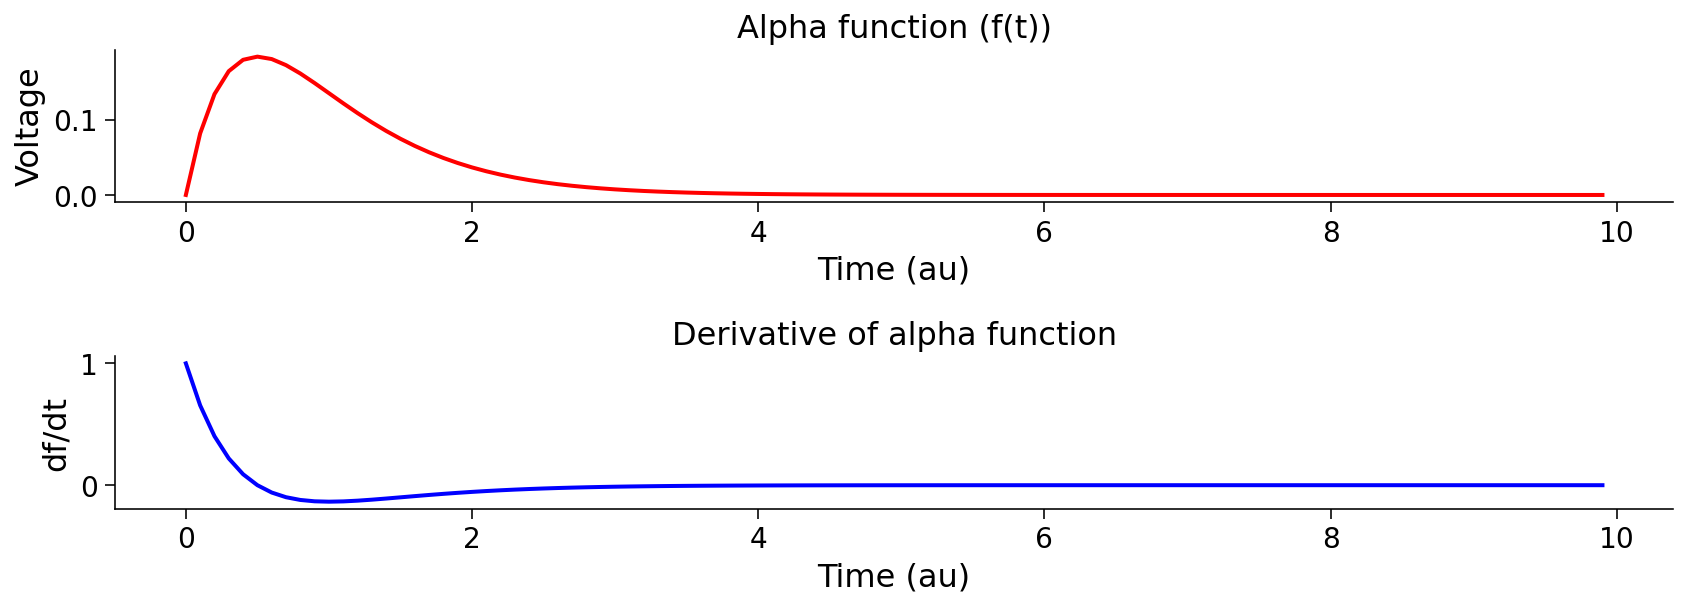

In [8]:
########################################################################
## TODO for students
## Complete all ... in code below and remove
#raise NotImplementedError("Calculate the derivatives")
########################################################################

# Define time, time constant
t = np.arange(0, 10, .1)
tau = 0.5

# Compute alpha function
f = t * np.exp(-t/tau)

# Define u(t), v(t)
u_t = t
v_t = np.exp(-t/tau)

# Define du/dt, dv/dt
du_dt = 1
dv_dt = (-1/tau)*np.exp(-t/tau)

# Define full derivative
df_dt = du_dt*v_t + dv_dt*u_t

# Visualize
plot_alpha_func(t, f, df_dt)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D4_Calculus/solutions/W0D4_Tutorial1_Solution_636667ff.py)

*Example output:*

<img alt='Solution hint' align='left' width=1687.0 height=607.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D4_Calculus/static/W0D4_Tutorial1_Solution_636667ff_0.png>



### Section 2.1.2: Chain Rule
Many times we encounter situations in which the variable $a$ is changing with time ($t$) and affecting another variable $r$. How can we estimate the derivative of $r$ with respect to $a$ i.e. $\frac{dr}{da} = ?$

To calculate $\frac{dr}{da}$ we use the [Chain Rule](https://en.wikipedia.org/wiki/Chain_rule).

\begin{align}
\frac{dr}{da} = \frac{dr}{dt}\cdot\frac{dt}{da}
\end{align}

That is, we calculate the derivative of both variables with respect to t and divide that derivative of $r$ by that  derivative of $a$. 

We can also use this formula to simplify taking derivatives of complex functions! We can make an arbitrary function t so that we can compute more simple derivatives and multiply, as we will see in this exercise.



#### Math Exercise 2.1.2: Chain Rule

Let's say that:
$$ r(a) = e^{a^4 + 1} $$

What is $\frac{dr}{da}$? This is a more complex function so we can't simply consult a table of common derivatives. Can you use the chain rule to help?

Hint: we didn't define t but you could set t equal to the function in the exponent.

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D4_Calculus/solutions/W0D4_Tutorial1_Solution_a0e42694.py)



### Section 2.2.3: Derivatives in Python using Sympy

There is a useful Python library for getting the analytical derivatives of functions: Sympy. We actually used this in Interactive Demo 1, under the hood.

See the following cell for an example of setting up a sympy function and finding the derivative.

In [9]:
# For sympy we first define our symbolic variables
f, t = sp.symbols('f, t')

# Function definition (sigmoid)
f = 1/(1 + sp.exp(-(t-5)))

# Get the derivative
diff_f = sp.diff(f)

# Print the resulting function
print('Derivative of', f, 'is ', diff_f)

Derivative of 1/(exp(5 - t) + 1) is  exp(5 - t)/(exp(5 - t) + 1)**2


## Section 2.2: Numerical Differentiation

*Estimated timing to here from start of tutorial: 30 min*

Formally, the derivative of a function $\mathcal{f}(x)$ at any value $a$ is given by the finite difference formula (FD): 

\begin{align*}
FD = \frac{f(a+h) - f(a)}{h}
\end{align*}

As $h\rightarrow 0$, the FD approaches the actual value of the derivative. Let's check this.

*Note that the numerical estimate of the derivative will result
in a time series whose length is one short of the original time series.*

### Interactive Demo 2.2: Numerical Differentiation of the Sine Function

Below, we find the numerical derivative of the sine function for different values of $h$, and and compare the result the analytical solution.

- What values of h result in more accurate numerical derivatives?

In [ ]:
# @markdown *Execute this cell to enable the widget.*
def numerical_derivative_demo(h = 0.2):
  # Now lets create a sequence of numbers which change according to the sine function
  dt = 0.01
  tx = np.arange(-10, 10, dt)
  sine_fun = np.sin(tx)

  # symbolic diffrentiation tells us that the derivative of sin(t) is cos(t)
  cos_fun = np.cos(tx)

  # Numerical derivative using difference formula
  n_tx = np.arange(-10,10,h) # create new time axis
  n_sine_fun = np.sin(n_tx) # calculate the sine function on the new time axis
  sine_diff = (n_sine_fun[1:] - n_sine_fun[0:-1]) / h

  fig = plt.figure()
  ax = plt.subplot(111)
  plt.plot(tx, sine_fun, label='sine function')
  plt.plot(tx, cos_fun, label='analytical derivative of sine')

  with plt.xkcd():
    # notice that numerical derivative will have one element less
    plt.plot(n_tx[0:-1], sine_diff, label='numerical derivative of sine')
    plt.xlim([-10, 10])
    plt.xlabel('Time (au)')
    plt.ylabel('f(x) or df(x)/dt')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
              ncol=3, fancybox=True)
    plt.show()

_ = widgets.interact(numerical_derivative_demo, h = (0.01, 0.5, .02))

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D4_Calculus/solutions/W0D4_Tutorial1_Solution_36cd3b93.py)



## Section 2.3: Transfer Function and Gain of a Neuron

*Estimated timing to here from start of tutorial: 34 min*

When we inject a constant current (DC) in a neuron, its firing rate changes as a function of strength of the injected current. This is called the **input-output transfer function** or just the *transfer function* or *I/O Curve* of the neuron. For most neurons this can be approximated by a sigmoid function e.g.

\begin{align}
rate(I) = \frac{1}{1+\text{e}^{-a*(I-\theta)}} - \frac{1}{exp(a*\theta)} + \eta
\end{align}

where $I$ is injected current, $rate$ is the neuron firing rate and $\eta$ is noise (Gaussian noise with zero mean and $\sigma$ standard deviation).

*You will visit this equation in a different context in Week 3*

The slope of a neurons input-output transfer function ($\frac{d(r(I)}{dI}$) is called the **gain** of the neuron, as it tells how the neuron output will change if the input is changed. In other words, the slope of the transfer function tells us in which range of inputs the neuron output is most sensitive to changes in its input. 


### Interactive Demo 2.3: Calculating the Transfer Function and Gain of a Neuron

In the following demo, you can estimate the gain of the following neuron transfer function using numerical differentiaton. We will use our timestep as h. See the cell below for a function that computes the rate via the fomula above and then the gain using numerical differentiation. In the following cell, you can play with the parameters $a$ and $\theta$ to change the shape of the transfer functon (and see the resulting gain function). You can also set $I_{mean}$ to see how the slope is computed for that value of I. In the left plot, the red vertical lines are the two values of the current being used to compute the slope, while the blue lines point to the corresponding ouput firing rates.


Change the parameters of the neuron transfer function (i.e. $a$ and $\theta$) and see if you can predict the value of $I$ for which the neuron has maximal slope and which parameter determines the peak value of the gain.


1.   Ensure you understand how the right plot relates to the left!
2.   How does $\theta$ affect the transfer function and gain?
3.   How does $a$ affect the transfer function and gain?



In [10]:
def compute_rate_and_gain(I, a, theta, current_timestep):
  """ Compute rate and gain of neuron based on parameters

  Args:
    I (ndarray): different possible values of the current
    a (scalar): parameter of the transfer function
    theta (scalar): parameter of the transfer function
    current_timestep (scalar): the time we're using to take steps

  Returns:
    (ndarray, ndarray): rate and gain for each possible value of I
  """

  # Compute rate
  rate = (1+np.exp(-a*(I-theta)))**-1 - (1+np.exp(a*theta))**-1

  # Compute gain using a numerical derivative
  gain = (rate[1:] - rate[0:-1])/current_timestep

  return rate, gain

In [11]:
# @markdown Execute this cell to enable the widget

def plot_rate_and_gain(a, theta, I_mean):

  current_timestep = 0.1

  # Compute I
  I = np.arange(0, 8, current_timestep)

  rate, gain = compute_rate_and_gain(I, a, theta, current_timestep)
  I_1 = I_mean - current_timestep/2
  rate_1 = (1+np.exp(-a*(I_1-theta)))**-1 - (1+np.exp(a*theta))**-1
  I_2 = I_mean + current_timestep/2
  rate_2 = (1+np.exp(-a*(I_2-theta)))**-1 - (1+np.exp(a*theta))**-1

  input_range = I_2-I_1
  output_range = rate_2 - rate_1

  # Visualize rate and gain
  plt.subplot(1,2,1)
  plt.plot(I,rate)
  plt.plot([I_1,I_1],[0, rate_1],color='r')
  plt.plot([0,I_1],[rate_1, rate_1],color='b')
  plt.plot([I_2,I_2],[0, rate_2],color='r')
  plt.plot([0,I_2],[rate_2, rate_2],color='b')
  plt.xlim([0, 8])
  low, high = plt.ylim()
  plt.ylim([0, high])

  plt.xlabel('Injected current (au)')
  plt.ylabel('Output firing rate (normalized)')
  plt.title('Transfer function')

  plt.text(2, 1.3, 'Output-Input Ratio =' + str(np.round(1000*output_range/input_range)/1000), style='italic',
      bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
  plt.subplot(1,2,2)
  plt.plot(I[0:-1], gain)
  plt.plot([I_mean, I_mean],[0,0.6],color='r')
  plt.xlabel('Injected current (au)')
  plt.ylabel('Gain')
  plt.title('Gain')
  plt.xlim([0, 8])
  low, high = plt.ylim()
  plt.ylim([0, high])

_ = widgets.interact(plot_rate_and_gain, a = (0.5, 2.0, .02), theta=(1.2,4.0,0.1), I_mean= (0.5,8.0,0.1))

interactive(children=(FloatSlider(value=1.24, description='a', max=2.0, min=0.5, step=0.02), FloatSlider(value…

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D4_Calculus/solutions/W0D4_Tutorial1_Solution_6ae0b0ff.py)



# Section 3: Functions of Multiple Variables

*Estimated timing to here from start of tutorial: 44 min*




In [ ]:
# @title Video 4: Functions of multiple variables
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV1Ly4y1M77D", width=854, height=480, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="Mp_uNNNiQAI", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

This video covers what partial derivatives are.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

In the previous section, you looked at function of single variable $t$ or $x$. In most cases, we encounter functions of multiple variables. For example, in the brain, the firing rate of a neuron is a function of both excitatory and inhibitory input rates. In the following, we will look into how to calculate derivatives of such functions.

When we take the derrivative of a multivariable function with respect to one of the variables it is called the **partial derivative**. For example if we have a function:

\begin{align}
f(x,y) = x^2 + 2xy + y^2
\end{align}

The we can define the partial derivatives as

\begin{align}
\frac{\partial(f(x,y))}{\partial x} = 2x + 2y + 0 \\\\
\frac{\partial(f(x,y))}{\partial y} = 0 + 2x + 2y
\end{align}

In the above, the derivative of the last term ($y^2$) with respect to $x$ is zero because it does not change with respect to $x$. Similarly, the derivative of $x^2$ with respect to $y$ is also zero.
</details>



Just as with the derivatives we saw earlier, you can get partial derivatives through either an analytical method (finding an exact equation) or a numerical method (approximating).

### Interactive Demo 3: Visualize partial derivatives

In the demo below, you can input any function of x and y and then visualize both the function and partial derivatives. 

We visualized the 2-dimensional function as a surface plot in which the values of the function are rendered as color. Yellow represents a high value and blue represents a low value. The height of the surface also shows the numerical value of the function. A more complete description of 2D surface plots and why we need them is located in Bonus Section 1.1. The first plot is that of our function. And the two bottom plots are the derivative surfaces with respect to $x$ and $y$ variables.

1.   Ensure you understand how the plots relate to each other - if not, review the above material
2.   Can you come up with a function where the partial derivative with respect to x will be a linear plane and the derivative with respect to y will be more curvy?
3.   What happens to the partial derivatives if there are no terms involving multiplying x and y together?



In [ ]:
# @markdown Execute this widget to enable the demo

# Let's use sympy to calculate Partial derivatives of a function of 2-variables
@interact(f2d_string = 'x**2 + 2*x*y + y**2')
def plot_partial_derivs(f2d_string):
  f, x, y = sp.symbols('f, x, y')

  f2d = eval(f2d_string)
  f2d_dx = sp.diff(f2d,x)
  f2d_dy = sp.diff(f2d,y)

  print('Partial derivative of ', f2d, 'with respect to x is', f2d_dx)
  print('Partial derivative of ', f2d, 'with respect to y is', f2d_dy)

  p1 = sp.plotting.plot3d(f2d, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='f(x,y)',title='Our function')

  p2 = sp.plotting.plot3d(f2d_dx, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='df(x,y)/dx',title='Derivative w.r.t. x')

  p3 = sp.plotting.plot3d(f2d_dy, (x, -5, 5), (y, -5, 5),show=True,xlabel='x', ylabel='y', zlabel='df(x,y)/dy',title='Derivative w.r.t. y')

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D4_Calculus/solutions/W0D4_Tutorial1_Solution_8a586322.py)



To see an application of the numerical calculation of partial derivatives to understand a neuron driven by excitatory and inhibitory inputs, see Bonus Section 1!  

We will use the partial derivative several times in the course. For example partial derivative are used the calculate the Jacobian of a system of differential equations. The Jacobian is used to determine the dynamics and stability of a system. This will be introduced in the second week while studying the dynamics of excitatory and inhibitory population interactions. 

---
# Section 4: Numerical Integration


In [ ]:
# @title Video 5: Numerical Integration
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV1p54y1H7zt", width=854, height=480, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="cT0_CbD_h9Q", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

This video covers numerical integration and specifically Riemann sums.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>

Geometrically, integration is the area under the curve. This interpretation gives two formal ways to calculate the integral of a function numerically. 

**[Riemann sum](https://en.wikipedia.org/wiki/Riemann_sum)**: 
If we wish to integrate a function $f(t)$ with respect to $t$, then first we divide the function into $n$ intervals of size $dt = a-b$, where $a$ is the starting of the interval. Thus, each interval gives a rectangle with height $f(a)$ and width $dt$. By summing the area of all the rectangles, we can approximate the area under the curve. As the size $dt$ approaches to zero, our estimate of the integral approcahes the analytical calculation. Essentially, the Riemann sum is cutting the region under the curve in vertical stripes, calculating area of the each stripe and summing them up.

</details>

## Section 4.1: Demonstration of the Riemann Sum

*Estimated timing to here from start of tutorial: 60 min*


### Interactive Demo 4.1: Riemann Sum vs. Analytical Integral with changing step size

Below, we will compare numerical integration using the Riemann Sum with the analytical solution. You can change the interval size $dt$ using the slider.



1.   What values of dt result in the best numerical integration?
2.   What is the downside of choosing that value of dt?
3.   With large dt, why are we underestimating the integral (as opposed to overestimating?




In [12]:
# @markdown Run this cell to enable the widget!
def riemann_sum_demo(dt = 0.5):
  step_size = 0.1
  min_val = 0.
  max_val = 10.
  tx = np.arange(min_val, max_val, step_size)

  # Our function
  ftn = tx**2 - tx + 1
  # And the integral analytical formula calculates using sympy
  int_ftn = tx**3/3 - tx**2/2 + tx

  # Numerical integration of f(t) using Riemann Sum
  n = int((max_val-min_val)/dt)
  r_tx = np.zeros(n)
  fun_value = np.zeros(n)
  for ii in range(n):
    a = min_val+ii*dt
    fun_value[ii] = a**2 - a + 1
    r_tx[ii] = a;

  # Riemann sum is just cumulative sum of the fun_value multiplied by the
  r_sum = np.cumsum(fun_value)*dt
  with plt.xkcd():
    plt.figure(figsize=(20,5))
    ax = plt.subplot(1,2,1)
    plt.plot(tx,ftn,label='Function')

    for ii in range(n):
      plt.plot([r_tx[ii], r_tx[ii], r_tx[ii]+dt, r_tx[ii]+dt], [0, fun_value[ii], fun_value[ii], 0] ,color='r')

    plt.xlabel('Time (au)')
    plt.ylabel('f(t)')
    plt.title('f(t)')
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(tx,int_ftn,label='Analytical')
    plt.plot(r_tx+dt,r_sum,color = 'r',label='Riemann Sum')
    plt.xlabel('Time (au)')
    plt.ylabel('int(f(t))')
    plt.title('Integral of f(t)')
    plt.grid()
    plt.legend()
    plt.show()


_ = widgets.interact(riemann_sum_demo, dt = (0.1, 1., .02))

interactive(children=(FloatSlider(value=0.5, description='dt', max=1.0, min=0.1, step=0.02), Output()), _dom_c…

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D4_Calculus/solutions/W0D4_Tutorial1_Solution_fd942e45.py)



There are other methods of numerical integration, such as 
**[Lebesgue integral](https://en.wikipedia.org/wiki/Lebesgue_integral)** and **Runge Kutta**. In the Lebesgue integral, we divide the area under the curve into horizontal stripes. That is, instead of the independent variable, the range of the function $f(t)$ is divided into small intervals. In any case, the Riemann sum is the basis of Euler's method of integration for solving ordinary differential equations - something you will do in a later tutorial today.


## Section 4.2: Neural Applications of Numerical Integration

*Estimated timing to here from start of tutorial: 68 min*


### Coding Exercise 4.2: Calculating Charge Transfer with Excitatory Input
An incoming spike elicits a change in the post-synaptic membrane potential ($PSP(t)$) which can be captured by the following function

\begin{align}
PSP(t) = J\times t\times exp\big(-\frac{t-t_{sp}}{\tau_{s}}\big)
\end{align}

where $J$ is the synaptic amplitude, $t_{sp}$ is the spike time and $\tau_s$ is the synaptic time constant.

Estimate the total charge transfered to the postsynaptic neuron during an PSP with amplitude $J=1.0$, $\tau_s = 1.0$ and $t_{sp} = 1.$ (that is the spike occured at 1ms). The total charge will be the integral of the PSP function.

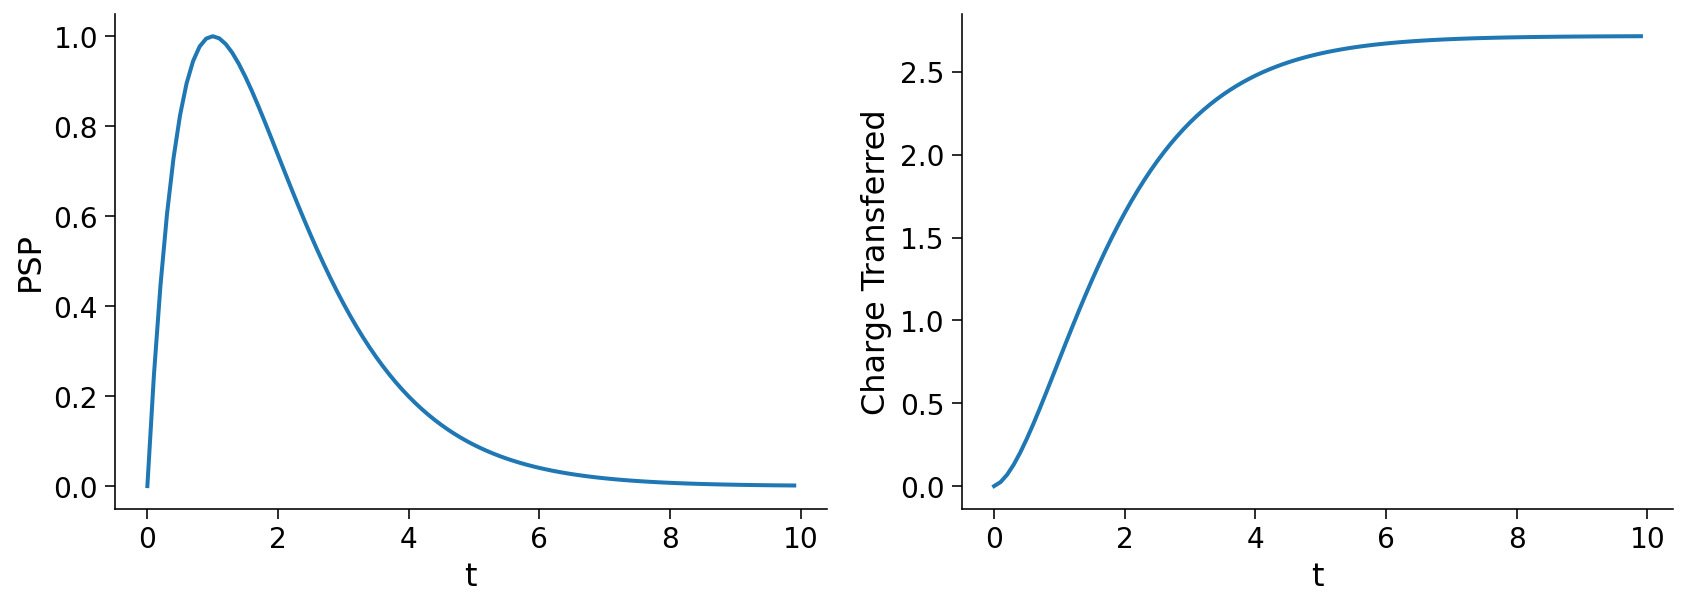

In [14]:
########################################################################
## TODO for students
## Complete all ... in code below and remove
#raise NotImplementedError("Calculate the charge transfer")
########################################################################

# Set up parameters
J = 1
tau_s = 1
t_sp = 1
dt = .1
t = np.arange(0, 10, dt)

# Code PSP formula
PSP = J*t*np.exp(-(t-t_sp)/tau_s)

# Compute numerical integral
# We already have PSP at every time step (height of rectangles). We need to
#.  multiply by width of rectangles (dt) to get areas
rectangle_areas = PSP*dt

# Cumulatively sum rectangles (hint: use np.cumsum)
numerical_integral = np.cumsum(rectangle_areas)

# Visualize
plot_charge_transfer(t, PSP, numerical_integral)

[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D4_Calculus/solutions/W0D4_Tutorial1_Solution_200c1e98.py)

*Example output:*

<img alt='Solution hint' align='left' width=1687.0 height=607.0 src=https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/tutorials/W0D4_Calculus/static/W0D4_Tutorial1_Solution_200c1e98_0.png>



You can see from the figure that the total charge transferred is a little over 2.5. 

---
# Section 5: Differentiation and Integration as Filtering Operations

*Estimated timing to here from start of tutorial: 75 min*

In [ ]:
# @title Video 6: Filtering Operations
from ipywidgets import widgets

out2 = widgets.Output()
with out2:
  from IPython.display import IFrame
  class BiliVideo(IFrame):
      def __init__(self, id, page=1, width=400, height=300, **kwargs):
          self.id=id
          src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
          super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="BV1Vy4y1M7oT", width=854, height=480, fs=1)
  print('Video available at https://www.bilibili.com/video/{0}'.format(video.id))
  display(video)

out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id="7_ZjlT2d174", width=854, height=480, fs=1, rel=0)
  print('Video available at https://youtube.com/watch?v=' + video.id)
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

This video covers a different interpretation of differentiation and integration: viewing them as filtering operations.

<details>
<summary> <font color='blue'>Click here for text recap of video </font></summary>
In the above, we used the notions that geometrically integration is the area under the curve and differentiation is the slope of the curve. There is another interpretation of these two operations.

As we calculate the derivative of a function, we take the difference of adjacent values of the function. This results in the removal of common part between the two values. As a consequence, we end up removing the unchanging part of the signal. If we now think in terms of frequencies, differentiation removes low frequencies, or slow changes. That is, differentiation acts as a high pass filter. 

Integration does the opposite because in the estimation of an integral we keep adding adjacent values of the signal. So, again thinking in terms of frequencies, integration is akin to the removal of high frequencies or fast changes (low-pass filter). The shock absorbers in your bike are an example of integrators. 

We can see this behavior the demo below. Here we will not work with functions, but with signals. As such, functions and signals are the same. Just that in most cases our signals are measurements with respect to time.

In [ ]:
# @markdown Execute this cell to see visualization
h = 0.01
tx = np.arange(0,2,h)
noise_signal = np.random.uniform(0, 1, (len(tx)))*0.5
x1 = np.sin(0.5*np.pi*tx) + noise_signal # This will generate a 1 Hz sin wave
# In the signal x1 we have added random noise which contributs the high frequencies

# Take the derivative equivalent of the signal i.e. subtract the adjacent values
x1_diff = (x1[1:] - x1[:-1])

# Take the integration equivalent of the signal i.e. sum the adjacent values. And divide by 2 (take average essentially)
x1_integrate = (x1[1:] + x1[:-1])/2

# Plotting code
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(tx,x1,label='Original Signal')
#plt.xlabel('Time (sec)')
plt.ylabel('Signal Value(au)')
plt.legend()

plt.subplot(3,1,2)
plt.plot(tx[0:-1],x1_diff,label='Differentiated Signal')
# plt.xlabel('Time (sec)')
plt.ylabel('Differentiated Value(au)')
plt.legend()

plt.subplot(3,1,3)
plt.plot(tx,x1,label='Original Signal')
plt.plot(tx[0:-1],x1_integrate,label='Integrate Signal')
plt.xlabel('Time (sec)')
plt.ylabel('Integrate Value(au)')
plt.legend()

Notice how the differentiation operation amplifies the fast changes which were contributed by noise. By contrast, the integration operation supresses the fast changing noise. If we perform the same operation of averaging the adjancent samples on the orange trace, we will further smooth the signal.  Such sums and subtractions form the basis of digital filters. 




---
# Summary

*Estimated timing of tutorial: 80 minutes*

* Geometrically, integration is the area under the curve and differentiation is the slope of the function
* The concepts of slope and area can be easily extended to higher dimensions. We saw this when we took the derivative of a 2-dimensional transfer function of a neuron
* Numerical estimates of both derivatives and integrals require us to choose a time step $h$. The smaller the $h$, the better the estimate, but for small values of $h$, more computations are needed. So there is always some tradeoff.
* Partial derivatives are just the estimate of the slope along one of the many dimensions of the function. We can combine the slopes in different directions using vector sum to find the direction of the slope.
* Because the derivative of a function is zero at the local peak or trough, derivatives are used to solve optimization problems.
* When thinking of signal, integration operation is equivalent to smoothening the signals (i.e. remove fast changes)
* Differentiation operations remove slow changes and enhance high frequency content of a signal

---
# Bonus Section 1: Numerical calculation of partial derivatives




## Bonus Section 1.1: Understanding 2D plots

Let's take the example of a  neuron driven by excitatory and inhibitory inputs. Because this is for illustrative purposes, we will not go in the details of the numerical range of the input and output variables.

In the function below, we assume that the firing rate of a neuron increases motonotically with an increase in excitation and decreases monotonically with an increase in inhibition. The inhibition is modelled as a subtraction. Like for the 1-dimensional transfer function, here we assume that we can approximate the transfer function as a sigmoid function.

To evaluate the partial derivatives we can use the same numerical differentiation as before but now we apply it to each row and column separately. 

In [ ]:
# @markdown Execute this cell to visualize the neuron firing rate surface
def sigmoid_function(x,a,theta):
    '''
    Population activation function.

    Expects:
    x     : the population input
    a     : the gain of the function
    theta : the threshold of the function

    Returns:
    the population activation response F(x) for input x
    '''
    # add the expression of f = F(x)
    f = (1+np.exp(-a*(x-theta)))**-1 - (1+np.exp(a*theta))**-1

    return f

# Neuron Transfer function
step_size = 0.1
exc_input = np.arange(2,9,step_size)
inh_input = np.arange(0,7,step_size)
exc_a = 1.2
exc_theta = 2.4
inh_a = 1.
inh_theta = 4.

rate = np.zeros((len(exc_input),len(inh_input)))

for ii in range(len(exc_input)):
  for jj in range(len(inh_input)):
    rate[ii,jj] = sigmoid_function(exc_input[ii],exc_a,exc_theta) - sigmoid_function(inh_input[jj],inh_a,inh_theta)*0.5

with plt.xkcd():
  X, Y = np.meshgrid(exc_input, inh_input)
  fig = plt.figure(figsize=(12,12))
  ax1 = fig.add_subplot(2,2,1)
  lg_txt = 'Inhibition = ' + str(inh_input[0])
  ax1.plot(exc_input,rate[:,0],label=lg_txt)
  lg_txt = 'Inhibition = ' + str(inh_input[20])
  ax1.plot(exc_input,rate[:,20],label=lg_txt)
  lg_txt = 'Inhibition = ' + str(inh_input[40])
  ax1.plot(exc_input,rate[:,40],label=lg_txt)
  ax1.legend()
  ax1.set_xlabel('Excitatory input (au)')
  ax1.set_ylabel('Neuron output rate (au)');

  ax2 = fig.add_subplot(2,2,2)
  lg_txt = 'Excitation = ' + str(exc_input[0])
  ax2.plot(inh_input,rate[0,:],label=lg_txt)
  lg_txt = 'Excitation = ' + str(exc_input[20])
  ax2.plot(inh_input,rate[20,:],label=lg_txt)
  lg_txt = 'Excitation = ' + str(exc_input[40])
  ax2.plot(inh_input,rate[40,:],label=lg_txt)
  ax2.legend()
  ax2.set_xlabel('Inhibitory input (au)')
  ax2.set_ylabel('Neuron output rate (au)');

  ax3 = fig.add_subplot(2, 1, 2, projection='3d')
  surf= ax3.plot_surface(Y.T, X.T, rate, rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none')
  ax3.set_xlabel('Inhibitory input (au)')
  ax3.set_ylabel('Excitatory input (au)')
  ax3.set_zlabel('Neuron output rate (au)');
  fig.colorbar(surf)

In the **Top-Left** plot, we see how the neuron output rate increases as a function of excitatory input (e.g. the blue trace). However, as we increase inhibition, expectedly the neuron output decreases and the curve is shifted downwards. This constant shift in the curve suggests that the effect of inhibition is subtractive, and the amount of subtraction does not depend on the neuron output. 

We can alternatively see how the neuron output changes with respect to inhibition and study how excitation affects that. This is visualized in the **Top-Right** plot.

This type of plotting is very intuitive, but it becomes very tedious to visualize when there are larger numbers of lines to be plotted. A nice solution to this visualization problem is to render the data as color, as surfaces, or both. 

This is what we have done in the plot on the bottom. The colormap on the right shows the output of the neuron as a function of inhibitory input and excitatory input. The output rate is shown both as height along the z-axis and as the color. Blue means low firing rate and yellow means high firing rate (see the color bar).


In the above plot, the output rate of the neuron goes below zero. This is of course not physiological as neurons cannot have negative firing rates. In models, we either choose the operating point such that the output does not go below zero, or else we clamp the neuron output to zero if it goes below zero. You will learn about it more in Week 2.

## Bonus Section 1.2: Numerical partial derivatives

We can now compute the partial derivatives of our transfer function in response to excitatory and inhibitory input. We do so below! 

In [ ]:
# @markdown Execute this cell implement our neural transfer function, `plot_2d_neuron_transfer_function`, in respond to excitatory and inhibitory input
def plot_2d_neuron_transfer_function(exc_a, exc_theta, inh_a, inh_theta):
    # Neuron Transfer Function
    step_size = 0.1
    exc_input = np.arange(1,10,step_size)
    inh_input = np.arange(0,7,step_size)

    rate = np.zeros((len(exc_input),len(inh_input)))
    for ii in range(len(exc_input)):
      for jj in range(len(inh_input)):
        rate[ii,jj] = sigmoid_function(exc_input[ii],exc_a,exc_theta) - sigmoid_function(inh_input[jj],inh_a,inh_theta)*0.5

    # Derivative with respect to excitatory input rate
    rate_de = np.zeros((len(exc_input)-1,len(inh_input)))# this will have one row less than the rate matrix
    for ii in range(len(inh_input)):
      rate_de[:,ii] = (rate[1:,ii] - rate[0:-1,ii])/step_size

    # Derivative with respect to inhibitory input rate
    rate_di = np.zeros((len(exc_input),len(inh_input)-1))# this will have one column less than the rate matrix
    for ii in range(len(exc_input)):
      rate_di[ii,:] = (rate[ii,1:] - rate[ii,0:-1])/step_size


    X, Y = np.meshgrid(exc_input, inh_input)
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    surf1 = ax1.plot_surface(Y.T, X.T, rate, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('Inhibitory input (au)')
    ax1.set_ylabel('Excitatory input (au)')
    ax1.set_zlabel('Neuron output rate (au)')
    ax1.set_title('Rate as a function of Exc. and Inh');
    ax1.view_init(45, 10)
    fig.colorbar(surf1)

    Xde, Yde = np.meshgrid(exc_input[0:-1], inh_input)
    ax2 = fig.add_subplot(1, 3, 2, projection='3d')
    surf2 = ax2.plot_surface(Yde.T, Xde.T, rate_de, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax2.set_xlabel('Inhibitory input (au)')
    ax2.set_ylabel('Excitatory input (au)')
    ax2.set_zlabel('Neuron output rate (au)');
    ax2.set_title('Derivative wrt Excitation');
    ax2.view_init(45, 10)
    fig.colorbar(surf2)

    Xdi, Ydi = np.meshgrid(exc_input, inh_input[:-1])
    ax3 = fig.add_subplot(1, 3, 3, projection='3d')
    surf3 = ax3.plot_surface(Ydi.T, Xdi.T, rate_di, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    ax3.set_xlabel('Inhibitory input (au)')
    ax3.set_ylabel('Excitatory input (au)')
    ax3.set_zlabel('Neuron output rate (au)');
    ax3.set_title('Derivative wrt Inhibition');
    ax3.view_init(15, -115)
    fig.colorbar(surf3)

In [ ]:
plot_2d_neuron_transfer_function(exc_a = 1.2, exc_theta = 2.4, inh_a = 1, inh_theta = 4)

Is this what you expected? Change the parameters in the function to generate the 2-d transfer function of the neuron for different excitatory and inhibitory $a$ and $\theta$ and test your intuitions Can you relate this shape of the partial derivative surface to the gain of the 1-d transfer-function of a neuron (Section 2)?



[*Click for solution*](https://github.com/NeuromatchAcademy/course-content/tree/master//tutorials/W0D4_Calculus/solutions/W0D4_Tutorial1_Solution_cdb38705.py)

